In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
'''
RAW DATA 
(I computed the list of averages and standard deviations per query from
the 5 trials using Excel). Raw data that was in excel is shown below.
The numbers below represent the latency in nanoseconds.

	    Query 1	    Query 2	    Query 3	    Query 4	    Query 5	    Query 6	    Query 7
Trial 1	88117487	1450898240	70003427	63112478	93734497	83738452	899506827
Trial 2	746063	    807365	    972930	    724265	    739492	    759196	    819815
Trial 3	1603880	    760887	    656803	    874589	    698356	    777052	    1031089
Trial 4	955940	    782051	    986625	    846065	    744391	    932904	    748365
Trial 5	751853	    736084	    810266	    752629	    646533	    859494	    749111
'''

'''
Key: 
Query 1: grep -c GET
Query 2: grep -c -oE "\b([0-9]{1,3}\.){3}[0-9]{1,3}\b"
Query 3: grep -c PUT
Query 4: grep -c POST
Query 5: grep -c -vE "200|404"
Query 6: grep -c kline
Query 7: grep -c -oE "https?://[^ ]+"
'''

'\nKey: \nQuery 1: grep -c GET\nQuery 2: grep -c -oE "\x08([0-9]{1,3}\\.){3}[0-9]{1,3}\x08"\nQuery 3: grep -c PUT\nQuery 4: grep -c POST\nQuery 5: grep -c -vE "200|404"\nQuery 6: grep -c kline\nQuery 7: grep -c -oE "https?://[^ ]+"\n'

In [15]:
# x axis
x = np.array(['Query 1', 'Query 2', 'Query 3', 'Query 4', 'Query 5', 'Query 6', 'Query 7'])

# y axis
latencies_ns = np.array([[88117487,746063,1603880,955940,751853], [1450898240,807365,760887,782051,736084], [70003427,972930,656803,986625,810266], 
                [63112478,724265,874589,846065,752629], [93734497,739492,698356,744391,646533], [83738452,759196,777052,932904,859494], 
                [899506827,819815,1031089,748365,749111]])
latencies_ms = np.round(np.divide(latencies_ns, 1e6), 3)

averages_ns = np.array([18435044.6,290796925.4, 14686010.2,	13262005.2,	19312653.8,	17413419.6,	180571041.4])
averages_ms = np.round(np.divide(averages_ns, 1e6), 3) # convert ns to ms

# error bars
stds_ns = np.array([34842632.83, 580050657.8, 27658970.54, 24925299.24, 37210938.22, 33162574.27, 359467907.7])
stds_ms = np.round(np.divide(stds_ns, 1e6), 3)   # convert to ms

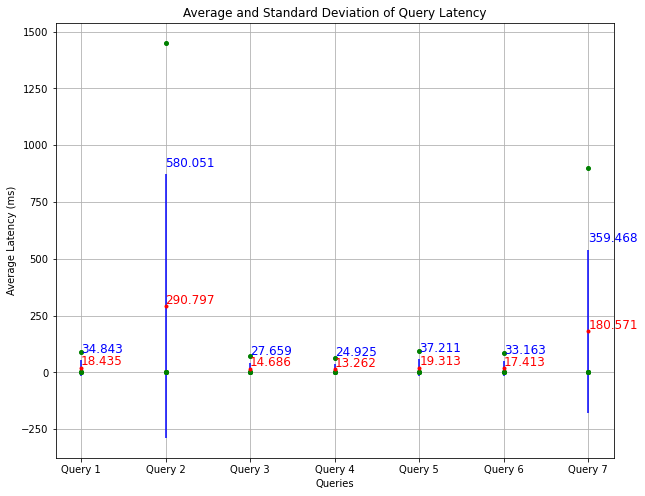

In [31]:
plt.figure(figsize=(10, 8))
plt.errorbar(x, averages_ms, stds_ms, fmt='o-', color='red', ecolor='blue', marker='.', linestyle='None')
plt.plot(x, latencies_ms, label='Latencies', color='green', linestyle='None', marker='o', markersize=4)
plt.xlabel('Queries')
plt.ylabel('Average Latency (ms)')
plt.title('Average and Standard Deviation of Query Latency')

# Add text labels for the actual values
for i, (xi, yi) in enumerate(zip(x, averages_ms)):
    plt.text(xi, yi, f'{yi}', ha='left', va='bottom', fontsize=12, color='red')
    plt.text(xi, yi + stds_ms[i] + 20, f'{stds_ms[i]}', ha='left', va='bottom', fontsize=12, color='blue')


plt.grid(True)
plt.show()